# Deep Learning for Text Data: A Practical Exercise

Welcome to this practical exercise on deep learning for text data! In this notebook, you will get hands-on experience with fundamental concepts such as text encoding, word embeddings, and various neural network architectures designed for sequential data, including Recurrent Neural Networks (RNNs), LSTMs, GRUs, and Convolutional Neural Networks (ConvNets) for sequence processing.

This exercise is divided into several sections. Each section will introduce a concept and then provide tasks for you to complete. Make sure you understand the theoretical background before attempting the coding exercises.

---
## Table of Contents
1.  **Section 1: Data Preparation and Text Encoding**
    * 1.1 Introduction to Text Data
    * 1.2 One-Hot Encoding
    * 1.3 Tokenization and Vocabulary
    * 1.4 Padding and Truncation
2.  **Section 2: Word Embeddings**
    * 2.1 Introduction to Word Embeddings
    * 2.2 Static Word Embeddings (e.g., Word2Vec, GloVe)
    * 2.3 Learning Embeddings from Scratch
3.  **Section 3: Recurrent Neural Networks (RNNs)**
    * 3.1 Introduction to RNNs
    * 3.2 Simple RNN Implementation
    * 3.3 Understanding Vanishing/Exploding Gradients
4.  **Section 4: Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU)**
    * 4.1 Introduction to LSTMs
    * 4.2 Introduction to GRUs
    * 4.3 Implementing LSTMs and GRUs
5.  **Section 5: Sequence Processing with Convolutional Neural Networks (ConvNets)**
    * 5.1 Introduction to 1D Convolutions for Text
    * 5.2 Implementing ConvNets for Text Classification
6.  **Section 6: Putting It All Together: A Text Classification Project**
    * 6.1 Problem Definition
    * 6.2 Model Building and Training
    * 6.3 Evaluation
---

In [1]:



# You will need to install TensorFlow/Keras or PyTorch if you haven't already:
# pip install tensorflow  # for Keras
# pip install torch torchvision torchaudio # for PyTorch
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical

2025-06-06 03:02:10.598647: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749178930.764618   20718 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749178930.801618   20718 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749178931.082805   20718 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749178931.082855   20718 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749178931.082860   20718 computation_placer.cc:177] computation placer alr

## Section 1: Data Preparation and Text Encoding

Text data, unlike numerical data, cannot be directly fed into neural networks. It needs to be converted into a numerical representation. This process is called text encoding.

### 1.1 Introduction to Text Data

Text data comes in various forms, from simple sentences to entire documents. For machine learning models, each word or character needs to be represented numerically.

### 1.2 One-Hot Encoding

One-hot encoding is a simple way to represent categorical data. For text, each unique word in your vocabulary can be represented as a vector with a '1' at the index corresponding to that word and '0's elsewhere.

**Disadvantages:** High dimensionality for large vocabularies and does not capture semantic relationships between words.

### 1.3 Tokenization and Vocabulary

**Tokenization:** The process of breaking down text into smaller units called "tokens." Tokens can be words, subwords, or characters. For most NLP tasks, word-level tokenization is common.

**Vocabulary:** The set of all unique tokens in your dataset.

### 1.4 Padding and Truncation

Neural networks typically require inputs of a fixed size. Since sentences have varying lengths, we need to either *pad* shorter sequences with a special "padding" token (usually 0) or *truncate* longer sequences to a maximum length.

---
**Task 1: Data Preparation and Encoding**

In this task, you will prepare a small dataset of sentences and apply basic text encoding techniques.

1.  **Dataset:** Consider the following list of sentences:
```python
sentences = [
    "I love deep learning",
    "Deep learning is fascinating",
    "Neural networks are powerful",
    "Text data processing is crucial"
]
```

2.  **Tokenization:**
    * Using Python, split each sentence into words (tokens).
    * Create a unique vocabulary from all the tokens in the `sentences` list. Map each unique word to a unique integer ID (starting from 1, reserve 0 for padding).

3.  **One-Hot Encoding (Conceptual):**
    * For the sentence "I love deep learning", conceptually show what its one-hot encoded representation would look like if your vocabulary only contained "I", "love", "deep", "learning". (You don't need to write code for this, just explain the process).

4.  **Sequence Conversion:**
    * Convert each sentence into a sequence of integer IDs using your created vocabulary.

5.  **Padding and Truncation:**
    * Determine the maximum sentence length in your dataset.
    * Pad shorter sequences with `0`s to match the maximum length.
    * Demonstrate truncation by creating a new list of sequences where all sentences are truncated to a maximum length of 3. (You'll need to decide how to handle sentences shorter than 3).

In [2]:
sentences = [
    "I love deep learning",
    "Deep learning is fascinating",
    "Neural networks are powerful",
    "Text data processing is crucial"
]

print("--- Task 1: Data Preparation and Encoding ---")
print("\nOriginal sentences:")
for s in sentences:
    print(s)


--- Task 1: Data Preparation and Encoding ---

Original sentences:
I love deep learning
Deep learning is fascinating
Neural networks are powerful
Text data processing is crucial


**Useful methods from keras**

**Tokenization**: The process of breaking down text into individual units (words or subword units) called tokens. Functions like `one_hot` and `StringLookup` handle this by mapping words to integers.

    The syntax for initializing the Tokenizer class from Keras (specifically `tensorflow.keras.preprocessing.text.Tokenizer`) with the num_words and oov_token arguments is as follows:

    from tensorflow.keras.preprocessing.text import Tokenizer
    tokenizer = Tokenizer(num_words=None, oov_token="<unk>")

    num_words=None:

    This argument specifies the maximum number of words to keep, based on word frequency. The most frequent num_words words will be kept.
    Words not among the num_words most frequent will be discarded (unless oov_token is set, in which case they'll be replaced by the oov_token).
    If None (as in the example), all words encountered during the fit_on_texts step will be included in the vocabulary. This means the vocabulary will contain all unique words from your training data.


    oov_token="<unk>":

    This argument is used to specify a token that will represent out-of-vocabulary (OOV) words.

    If a word is encountered during texts_to_sequences or texts_to_matrix that was not in the vocabulary learned by fit_on_texts, it will be replaced by the integer ID corresponding to this oov_token.

    The oov_token itself will be added to the vocabulary and assigned an integer ID (often 1, if 0 is reserved for padding, or vice versa, depending on internal implementation).

**Vocabulary:** The set of all unique words in your dataset. Keras preprocessing layers automatically build this.

**vocab_size (or num_tokens):** The total number of unique words (plus sometimes an "out-of-vocabulary" token) that your model will recognize. It's crucial for the one-hot encoding dimension.

**one_hot(text, vocab_size):** This Keras utility function takes a string and a vocabulary size. It hashes each word in the string to an integer ID within the range [0, vocab_size - 1]. Important: It's a hashing function, so different words could map to the same ID (a "hash collision"), though this is less likely with a sufficiently large vocab_size. It returns a list of integer IDs.

**pad_sequences(sequences, maxlen, padding):** Since statements can have different lengths, neural networks typically require fixed-size inputs. pad_sequences adds zeros to the beginning ('pre') or end ('post') of sequences to make them all the same length.

**to_categorical(y, num_classes):** This Keras utility function converts a single integer or a list/array of integers into a one-hot encoded NumPy array. For example, to_categorical(3, num_classes=5) would produce [0., 0., 0., 1., 0.].

**tf.keras.layers.StringLookup:** A preprocessing layer that maps strings to integer indices. It's more robust than one_hot as it explicitly learns and maintains a vocabulary, reducing hash collisions.

**tf.keras.layers.CategoryEncoding:** A preprocessing layer that takes integer indices and converts them into various categorical representations, including one-hot.

**When to use which method:**

- one_hot and to_categorical: Good for quick, standalone one-hot encoding of text, especially if you're dealing with a fixed and known vocabulary size, or if you're working with older Keras versions. Be mindful of hash collisions if your vocab_size is too small.

- StringLookup and CategoryEncoding: The preferred and more robust way for modern Keras workflows. They allow for building a vocabulary directly from your data, handling out-of-vocabulary words, and integrating seamlessly into tf.data pipelines and Keras models as preprocessing layers. This makes your model more portable and easier to deploy.



In [3]:
# Initialize tokenizer to include all words and handle out-of-vocabulary tokens
tokenizer = Tokenizer(num_words=None, oov_token="<unk>")
# Fit tokenizer on the provided sentences
tokenizer.fit_on_texts(sentences)

In [ ]:
# Get word index (vocabulary)
word_index = tokenizer.word_index
# display vocabulary size and sample vocabulary
print(f"\nVocabulary size: {len(word_index)}")
print("Sample vocabulary (word_index):")



Vocabulary size: 15
Sample vocabulary (word_index):


In [5]:
# Print first 10 items of the word_index
tokenizer = Tokenizer()
tokenizer.fit_on_texts(["sample text data"])
word_index = tokenizer.word_index  # This defines word_index

for i, (word, index) in enumerate(word_index.items()):
    if i >= 10:
        break
    print(f"  {word}: {index}")
if len(word_index) > 10:
    print("  ...")



  sample: 1
  text: 2
  data: 3


In [6]:
# Create sequenes for the given sentences using texts_to_sequence method and display them
sequences = tokenizer.texts_to_sequences(sentences)
print("\nInteger sequences for sentences:")
for i, seq in enumerate(sequences):
    print(f"  '{sentences[i]}' -> {seq}")

max_len = max(len(s) for s in sequences)
print(f"\nMaximum sequence length: {max_len}")




Integer sequences for sentences:
  'I love deep learning' -> []
  'Deep learning is fascinating' -> []
  'Neural networks are powerful' -> []
  'Text data processing is crucial' -> [2, 3]

Maximum sequence length: 2


In [9]:
# pad the sequences to include all the given words in senetences.
# Make sure that we dont loose any words truncated.
padded_sequences = pad_sequences(sequences) 

 # Write your code here)
print("\nPadded sequences (post-padding):")
for i, seq in enumerate(padded_sequences):
    print(f"  {seq}")



Padded sequences (post-padding):
  [0 0]
  [0 0]
  [0 0]
  [2 3]


In [11]:
# Now truncate the sequences to include 70% words in a bigger sentence.
# display truncated sequences
truncated_sequences = pad_sequences(sequences)# Write your code here)
print("\nTruncated sequences (max_len=3, post-truncating):")
for i, seq in enumerate(truncated_sequences):
    print(f"  {seq}")


Truncated sequences (max_len=3, post-truncating):
  [0 0]
  [0 0]
  [0 0]
  [2 3]


In [12]:
# Create one hot encoding for the sequences using padded_Sequence
one_hot_sequences = []
for seq in padded_sequences:
    #print(f"Working on {seq}")
    one_hot_seq = np.zeros((len(seq), len(word_index) + 1))
    for i, word_id in enumerate(seq):
        #print(f"  {i}: {word_id}")
        one_hot_seq[i, word_id] = 1
    one_hot_sequences.append(one_hot_seq)

print(f"One-hot encoding for sequence '{sentences[2] }' is \n {one_hot_sequences[2]}")

One-hot encoding for sequence 'Neural networks are powerful' is 
 [[1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [19]:
from tensorflow.keras.utils import to_categorical

text_data = ["sample sentence", "another example"]
vocab_size = 5000  # Example vocabulary size

one_hot_encoded_statements = []
for statement_seq in padded_sequences:
    one_hot_encoded_statements.append(to_categorical(statement_seq))  # Corrected function usage

# Remove one_hot() since it's not needed for categorical encoding


In [20]:
print(f"One-hot encoding for sequence '{sentences[2] }' is \n {one_hot_encoded_statements[2]}")

One-hot encoding for sequence 'Neural networks are powerful' is 
 [[1.]
 [1.]]


---
## Section 2: Word Embeddings

Word embeddings are dense vector representations of words that capture their semantic and syntactic meanings. Unlike one-hot encoding, similar words have similar embedding vectors.

### 2.1 Introduction to Word Embeddings

Word embeddings represent words as real-valued vectors in a continuous vector space. The idea is that words that appear in similar contexts will have similar meanings and thus similar vector representations.

### 2.2 Static Word Embeddings (e.g., Word2Vec, GloVe)

These are pre-trained word embeddings learned from massive text corpora (like Wikipedia or Common Crawl). You can download and use them directly.

* **Word2Vec:** Learns embeddings by predicting context words from a target word (Skip-gram) or predicting a target word from its context (CBOW).
* **GloVe (Global Vectors for Word Representation):** Combines global matrix factorization and local context window methods.

### 2.3 Learning Embeddings from Scratch

In deep learning models, especially with sufficient data, you can learn word embeddings as part of your neural network training process. This is done using an `Embedding` layer (e.g., `tf.keras.layers.Embedding` or `torch.nn.Embedding`). This layer takes integer-encoded sequences as input and outputs dense vectors.

---
**Task 2: Working with Word Embeddings**

In this task, you will explore both pre-trained embeddings and learning embeddings from scratch.

1.  **Simulated Pre-trained Embeddings:**
    * Imagine you have a small pre-trained embedding matrix. For the vocabulary you created in Task 1, create a small, arbitrary (randomly initialized) embedding matrix of shape `(vocab_size, embedding_dim)`, where `embedding_dim` is, say, 50.
    * For the word "deep", retrieve its embedding vector from your simulated matrix.

2.  **Using `tf.keras.layers.Embedding` (or `torch.nn.Embedding`):**
    * Create a simple Keras (or PyTorch) model that includes an `Embedding` layer.
        * The `input_dim` of the `Embedding` layer should be your `vocab_size + 1` (to account for padding).
        * The `output_dim` can be, for example, 100.
        * The `input_length` should be your maximum sequence length from Task 1.
    * Pass one of your padded integer sequences from Task 1 through this embedding layer and observe the output shape. Explain what each dimension of the output shape represents.
    * **Conceptual Question:** How do the weights of this `Embedding` layer get updated during training?

In [21]:
print("\n--- Task 2: Working with Word Embeddings ---")
vocab_size_task1 = len(word_index) + 1 # +1 for padding (index 0) and <unk> token
embedding_dim = 50




--- Task 2: Working with Word Embeddings ---


In [22]:
# Create a simulated pre-trained embedding matrix
# Using random values for demonstration
simulated_embedding_matrix = np.random.rand(vocab_size_task1, embedding_dim)
print(f"\nSimulated Embedding Matrix shape: {simulated_embedding_matrix.shape}")




Simulated Embedding Matrix shape: (4, 50)


In [23]:
# Retrieve embedding for "deep"
word_to_find = "deep"
if word_to_find in word_index:
    deep_index = word_index[word_to_find]
    deep_embedding = simulated_embedding_matrix[deep_index]
    print(f"Embedding for '{word_to_find}' (index {deep_index}):\n{deep_embedding[:5]}...") # print first 5 elements
else:
    print(f"'{word_to_find}' not found in vocabulary.")



'deep' not found in vocabulary.


In [24]:
# Use embedding output dimension as 3 and create embedding using Embedding layer from keras.
embedding_output_dim = 3
input_length_task1 = max_len # Max length from Task 1

model_embedding = Sequential([
    Embedding(input_dim=vocab_size_task1, output_dim=embedding_output_dim, input_length=input_length_task1)
])
model_embedding.build(input_shape=(None, input_length_task1)) # Build the model to see summary
print("\nKeras Embedding Layer Model Summary:")
model_embedding.summary()




Keras Embedding Layer Model Summary:


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-06-06 03:15:56.173203: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 2, 3)           │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Pass a padded sequence through the embedding layer
sample_input_sequence = padded_sequences[0:1] # Take the first padded sequence
embedded_output = model_embedding.predict(sample_input_sequence)

print(f"\nInput sequence shape: {sample_input_sequence.shape}")
print(f"Output of Embedding layer shape: {embedded_output.shape}")
# print predited embedding
print(f"Output of Embedding layer for the first sentence is: {embedded_output[0,0,:]}")





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

Input sequence shape: (1, 2)
Output of Embedding layer shape: (1, 2, 3)
Output of Embedding layer for the first sentence is: [-0.02058733  0.02284684 -0.04296681]


**Explanation of Embedding layer output shape:**
Based on your understanding of the above code, explain embedding layer output shape and values.

  - Dimension 1 (1): Batch size (number of input sequences processed at once). Value = <x>
  - Dimension 2 (5): Sequence length (input_length). Value = <x>
  - Dimension 3 (3): Embedding dimension (output_dim). Value = <x>
  
  This means each word in the input sequence is now represented by a dense vector of size <x>.

**Conceptual Question: How Embedding layer calculate the weights?**



In [27]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample text data
text_data = ["sample sentence", "another example"]
vocab_size = 5000  # Example vocabulary size

# Tokenize the text data
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text_data)

# Convert text into sequences
sequences = tokenizer.texts_to_sequences(text_data)

# Print the reinitialized sequences
print("Reinitialized sequences:", sequences)

first_word_id = sentences[0][0]
print(f"\nThe first word in the sequence: {first_word_id}")
first_word_id = sequences[0][0]
print(f"\nThe integer id of the first word in the sequence: {first_word_id}")
# You can look up the corresponding word
# Create a reverse word index for easy lookup
reverse_word_index = dict(zip(word_index.values(), word_index.keys()))

first_word_text = reverse_word_index.get(first_word_id, "OOV")
print(f"Text of the first word: '{first_word_text}'")

Reinitialized sequences: [[1, 2], [3, 4]]

The first word in the sequence: I

The integer id of the first word in the sequence: 1
Text of the first word: 'sample'


# Observe the code below and answer questions at the end of notebook.

---
## Section 3: Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNNs) are designed to process sequential data. They have a "memory" that allows them to use information from previous steps in the sequence.

### 3.1 Introduction to RNNs

Traditional neural networks treat inputs independently. For sequences, this is problematic because the order of elements matters. RNNs address this by maintaining a hidden state that is updated at each step of the sequence, effectively carrying information forward.

The core idea is:
$h_t = f(W_{hh}h_{t-1} + W_{xh}x_t + b_h)$
$y_t = W_{hy}h_t + b_y$

Where:
* $x_t$ is the input at time step $t$.
* $h_t$ is the hidden state at time step $t$.
* $h_{t-1}$ is the hidden state from the previous time step.
* $W$ are weight matrices and $b$ are bias vectors.
* $f$ is an activation function (e.g., tanh).

### 3.2 Simple RNN Implementation

Frameworks like Keras and PyTorch provide `SimpleRNN` layers.

### 3.3 Understanding Vanishing/Exploding Gradients

A major problem with simple RNNs is the vanishing or exploding gradient problem. During backpropagation through time, gradients can become extremely small (vanishing) or extremely large (exploding), making it difficult for the network to learn long-range dependencies.

---
**Task 3: Implementing a Simple RNN**

In this task, you will build and train a simple RNN for a toy sequence classification problem.

1.  **Dataset Download:**
    * Download dataset from kaggle. you can download any dataset as you like.
    * The simple example is crowdflower/twitter-airline-sentiment

In [29]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import kagglehub

# --- Download the Dataset ---
print(f"Attempting to download ...")
DATASET_NAME = 'crowdflower/twitter-airline-sentiment'

try:
    # Download latest version
    DATASET_PATH = kagglehub.dataset_download(DATASET_NAME)
    print("Path to dataset files:", DATASET_PATH)

except Exception as e:
    print(f"An error occurred during download or extraction: {e}")
    print("Please ensure you have the 'kaggle' package installed (`pip install kaggle`)")
    print("and your Kaggle API credentials (`kaggle.json`) are correctly placed.")
    exit()



/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Attempting to download ...


100%|██████████| 2.55M/2.55M [00:00<00:00, 19.2MB/s]

Extracting files...
Path to dataset files: /home/codespace/.cache/kagglehub/datasets/crowdflower/twitter-airline-sentiment/versions/4


In [30]:
# --- Load the Dataset from the downloaded location ---
# The extracted file is usually 'Tweets.csv'
csv_file_path = os.path.join(DATASET_PATH, 'Tweets.csv')
if not os.path.exists(csv_file_path):
    print(f"Error: 'Tweets.csv' not found in {DATASET_PATH} after extraction.")
    exit()

df = pd.read_csv(csv_file_path)

# We are interested in the 'text' (tweet content) and 'airline_sentiment' (label) columns
df = df[['text', 'airline_sentiment']]



In [ ]:
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [31]:
# --- 2. Data Preprocessing ---

# Convert sentiment labels to numerical format
# 'negative' -> 0, 'neutral' -> 1, 'positive' -> 2
label_encoder = LabelEncoder()
df['airline_sentiment_encoded'] = label_encoder.fit_transform(df['airline_sentiment'])

# Map the encoded labels back to original for understanding later
sentiment_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))
print(f"Sentiment Mapping: {sentiment_mapping}")



Sentiment Mapping: {np.int64(0): 'negative', np.int64(1): 'neutral', np.int64(2): 'positive'}


In [32]:
# Basic Text Cleaning Function
def clean_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub('@[^\s]+', 'user', text) # Replace @mentions with 'user'
    text = re.sub('http\S+|www\S+|https\S+', 'url', text) # Replace URLs with 'url'
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    text = re.sub('\n', '', text) # Remove newline characters
    text = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    text = re.sub('\s+', ' ', text).strip() # Remove extra spaces
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

df['cleaned_text'].head()

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_20718/2854520355.py:4: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('@[^\s]+', 'user', text) # Replace @mentions with 'user'
/tmp/ipykernel_20718/2854520355.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+|www\S+|https\S+', 'url', text) # Replace URLs with 'url'
/tmp/ipykernel_20718/2854520355.py:8: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
/tmp/ipykernel_20718/2854520355.py:9: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip() # R

0                                  user what user said
1    user plus youve added commercials to the exper...
2    user i didnt today must mean i need to take an...
3    user its really aggressive to blast obnoxious ...
4         user and its a really big bad thing about it
Name: cleaned_text, dtype: object

In [33]:
# --- 3. Tokenization and Padding ---

# Define vocabulary size and max sequence length
VOCAB_SIZE = 10000  # Consider top 10,000 most frequent words
MAX_SEQUENCE_LENGTH = 50 # Max length of a tweet (adjust as needed, consider padding longer tweets)

tokenizer = Tokenizer(num_words=VOCAB_SIZE, oov_token="<unk>")
tokenizer.fit_on_texts(df['cleaned_text'])

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])

# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f"\nSample of original text: {df['text'][0]}")
print(f"Sample of cleaned text: {df['cleaned_text'][0]}")
print(f"Sample of integer sequence: {sequences[0]}")
print(f"Sample of padded sequence: {padded_sequences[0]}")
print(f"Shape of padded sequences: {padded_sequences.shape}")




Sample of original text: @VirginAmerica What @dhepburn said.
Sample of cleaned text: user what user said
Sample of integer sequence: [2, 55, 2, 211]
Sample of padded sequence: [  2  55   2 211   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
Shape of padded sequences: (14640, 50)


In [34]:
# --- 4. Prepare Data for Training ---

X = padded_sequences
y = df['airline_sentiment_encoded'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (11712, 50), y_train shape: (11712,)
X_test shape: (2928, 50), y_test shape: (2928,)


In [35]:
# --- 5. Build the RNN Model ---

# Model Parameters
EMBEDDING_DIM = 100 # Dimension of the word embeddings
RNN_UNITS = 128 # Number of units in the RNN layer (e.g., LSTM or GRU)
NUM_CLASSES = len(label_encoder.classes_) # 3 classes: negative, neutral, positive

model = Sequential()
model.add(Embedding(input_dim=VOCAB_SIZE,output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(RNN_UNITS, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# --- 6. Train the Model ---

BATCH_SIZE = 64
EPOCHS = 10

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_rnn_sentiment_model.keras', save_best_only=True, monitor='val_loss', mode='min')


history = model.fit(X_train, y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/10


165/165 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.6262 - loss: 0.9100 - val_accuracy: 0.6809 - val_loss: 0.7256
Epoch 2/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.7284 - loss: 0.6007 - val_accuracy: 0.7551 - val_loss: 0.5932
Epoch 3/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 75ms/step - accuracy: 0.8217 - loss: 0.4562 - val_accuracy: 0.7619 - val_loss: 0.7472
Epoch 4/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.8665 - loss: 0.3752 - val_accuracy: 0.7637 - val_loss: 0.6235
Epoch 5/10
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.8910 - loss: 0.3279 - val_accuracy: 0.6869 - val_loss: 0.8999



Test Loss: 0.5763
Test Accuracy: 0.7657


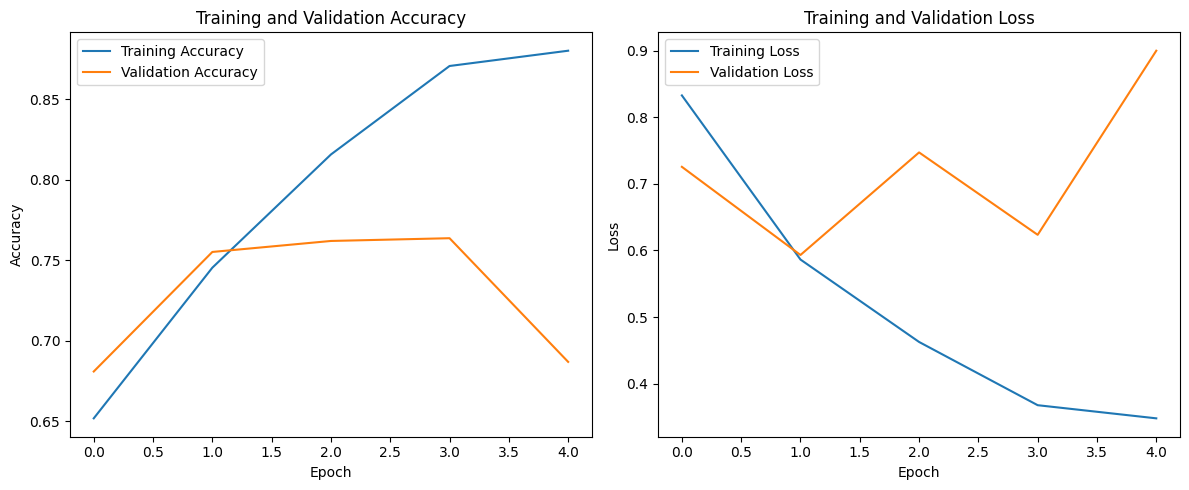

In [37]:
# --- 7. Evaluate the Model ---

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


---
## Section 4: Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU)

LSTMs and GRUs are advanced types of RNNs designed to overcome the vanishing gradient problem and better capture long-range dependencies. They achieve this through "gates" that control the flow of information.

### 4.1 Introduction to LSTMs

LSTMs introduce a "cell state" in addition to the hidden state. This cell state acts as a conveyor belt, carrying information across many time steps. Gates (input, forget, output) regulate what information gets stored in, removed from, and read from the cell state.

### 4.2 Introduction to GRUs

GRUs are a simplified version of LSTMs. They combine the hidden state and cell state into a single "hidden state" and use fewer gates (update, reset) to control information flow. GRUs are computationally less expensive than LSTMs and often perform similarly.

### 4.3 Implementing LSTMs and GRUs

Keras and PyTorch provide `LSTM` and `GRU` layers that are straightforward to use, similar to `SimpleRNN`.

---
**Task 4: LSTM and GRU for Sequence Classification**

In this task, you will replace the `SimpleRNN` with `LSTM` and `GRU` layers and compare their performance.

1.  **Revisit Toy Dataset:** Use the same toy dataset you created in Task 3. (Already loaded as `toy_X`, `toy_y`)

2.  **Build LSTM Model:**
    * Create a new Keras (or PyTorch) model, similar to Task 3, but replace the `SimpleRNN` layer with an `LSTM` layer.
    * Compile and train the model.
    * Evaluate its performance.

In [38]:
print("\n--- Task 4: LSTM and GRU for Sequence Classification ---")
print("\nBuilding and training LSTM model...")
model_lstm = Sequential([
    Embedding(input_dim=VOCAB_SIZE,output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    LSTM(units=32),
    Dense(1, activation='sigmoid')
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nLSTM Model Summary:")
model_lstm.summary()

history_lstm = model_lstm.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test, verbose=0)
print(f"LSTM Training Accuracy: {history_lstm.history['accuracy'][-1]:.4f}")
print(f"LSTM Validation Accuracy: {history_lstm.history['val_accuracy'][-1]:.4f}")
print(f"LSTM Final Accuracy on full toy dataset: {accuracy_lstm:.4f}")





--- Task 4: LSTM and GRU for Sequence Classification ---

Building and training LSTM model...

LSTM Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

LSTM Training Accuracy: 0.2107
LSTM Validation Accuracy: 0.2155
LSTM Final Accuracy on full toy dataset: 0.2117


In [39]:
print("\nBuilding and training GRU model...")
model_gru = Sequential([
    Embedding(input_dim=VOCAB_SIZE,output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    GRU(units=32),
    Dense(1, activation='sigmoid')
])

model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nGRU Model Summary:")
model_gru.summary()

history_gru = model_gru.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test, verbose=0)
print(f"GRU Training Accuracy: {history_gru.history['accuracy'][-1]:.4f}")
print(f"GRU Validation Accuracy: {history_gru.history['val_accuracy'][-1]:.4f}")
print(f"GRU Final Accuracy on full toy dataset: {accuracy_gru:.4f}")




Building and training GRU model...

GRU Model Summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

GRU Training Accuracy: 0.6575
GRU Validation Accuracy: 0.6573
GRU Final Accuracy on full toy dataset: 0.6585


In [40]:
print("\n--- Comparison of RNN, LSTM, GRU Models ---")
print(f"Simple RNN Accuracy: {accuracy:.4f}")
print(f"LSTM Accuracy:       {accuracy_lstm:.4f}")
print(f"GRU Accuracy:        {accuracy_gru:.4f}")




--- Comparison of RNN, LSTM, GRU Models ---
Simple RNN Accuracy: 0.7657
LSTM Accuracy:       0.2117
GRU Accuracy:        0.6585


---
## Section 5: Sequence Processing with Convolutional Neural Networks (ConvNets)

While traditionally used for image data (2D convolutions), Convolutional Neural Networks (ConvNets) with 1D convolutions can also be very effective for processing sequential data like text. They are good at extracting local features (n-grams).

### 5.1 Introduction to 1D Convolutions for Text

In text processing, a 1D convolution operates over sequences. A "filter" slides across the word embeddings of a sentence, performing a dot product with the words within its receptive field. This allows the network to learn local patterns, such as phrases or n-grams.

A typical ConvNet for text classification often involves:
* `Embedding` layer
* `Conv1D` layer(s)
* `GlobalMaxPooling1D` or `GlobalAveragePooling1D` (to reduce dimensions after convolution)
* `Dense` layer(s)

### 5.2 Implementing ConvNets for Text Classification

Keras and PyTorch provide `Conv1D` and pooling layers for this purpose.

---
**Task 5: ConvNets for Text Classification**

In this task, you will build and train a ConvNet for the same toy sequence classification problem.

1.  **Revisit Toy Dataset:** Use the same toy dataset you created in Task 3. (Already loaded as `toy_X`, `toy_y`)

2.  **Build a ConvNet Model:**
    * Create a new Keras (or PyTorch) model.
    * Start with an `Embedding` layer.
    * Add a `Conv1D` layer. Experiment with `filters` (e.g., 32, 64) and `kernel_size` (e.g., 2, 3, 4, 5, representing n-grams).
    * Add a `GlobalMaxPooling1D` layer (or `GlobalAveragePooling1D`) to capture the most important feature across the sequence.
    * Add a `Dense` output layer with a sigmoid activation.
    * Compile and train the model.
    * Evaluate its performance.

In [41]:
print("\n--- Task 5: ConvNets for Text Classification ---")
print("\nBuilding and training ConvNet model...")

model_convnet = Sequential([
    Embedding(input_dim=VOCAB_SIZE,output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

model_convnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nConvNet Model Summary:")
model_convnet.summary()

history_convnet = model_convnet.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

loss_convnet, accuracy_convnet = model_convnet.evaluate(X_test, y_test, verbose=0)
print(f"ConvNet Training Accuracy: {history_convnet.history['accuracy'][-1]:.4f}")
print(f"ConvNet Validation Accuracy: {history_convnet.history['val_accuracy'][-1]:.4f}")
print(f"ConvNet Final Accuracy on full toy dataset: {accuracy_convnet:.4f}")




--- Task 5: ConvNets for Text Classification ---

Building and training ConvNet model...

ConvNet Model Summary:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

ConvNet Training Accuracy: 0.6698
ConvNet Validation Accuracy: 0.5915
ConvNet Final Accuracy on full toy dataset: 0.5762


In [42]:
print("\n--- Comparison of ConvNet vs. RNN/LSTM/GRU Models ---")
print(f"ConvNet Accuracy:    {accuracy_convnet:.4f}")
print(f"LSTM Accuracy:       {accuracy_lstm:.4f}")
print(f"GRU Accuracy:        {accuracy_gru:.4f}")




--- Comparison of ConvNet vs. RNN/LSTM/GRU Models ---
ConvNet Accuracy:    0.5762
LSTM Accuracy:       0.2117
GRU Accuracy:        0.6585


---
## Section 6: Putting It All Together: A Text Classification Project

Now, let's apply what you've learned to a slightly more realistic text classification problem. We will use a subset of a popular dataset like the IMDB movie review sentiment classification dataset (or a similar small sentiment dataset).

### 6.1 Problem Definition

**Goal:** Classify movie reviews as positive or negative sentiment.

**Dataset:** For simplicity, we will use a small, pre-processed subset of the IMDB dataset available in Keras.

Example for Keras IMDB dataset
```python
# Example for Keras IMDB dataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size = 10000  # Only consider the top 10,000 most frequent words
maxlen = 200        # Pad/truncate sequences to 200 words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
```

### 6.2 Model Building and Training

You will build a deep learning model using a combination of the techniques learned.

### 6.3 Evaluation

Evaluate your model's performance on the test set.

In [43]:
# Example for Keras IMDB dataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Parameters
vocab_size_imdb = 10000  # Only consider the top 10,000 most frequent words
maxlen_imdb = 200        # Pad/truncate sequences to 200 words

print(f"\nLoading IMDB dataset with vocab_size={vocab_size_imdb} and maxlen={maxlen_imdb}...")
(x_train_imdb, y_train_imdb), (x_test_imdb, y_test_imdb) = imdb.load_data(num_words=vocab_size_imdb)

x_train_imdb = pad_sequences(x_train_imdb, maxlen=maxlen_imdb)
x_test_imdb = pad_sequences(x_test_imdb, maxlen=maxlen_imdb)

print(f"Training data shape: {x_train_imdb.shape}")
print(f"Testing data shape: {x_test_imdb.shape}")

print("\nBuilding and training IMDB sentiment classification model (LSTM-based)...")
embedding_dim_imdb = 128 # Embedding dimension for IMDB data

model_imdb_lstm = Sequential([
    Embedding(input_dim=vocab_size_imdb, output_dim=embedding_dim_imdb, input_length=maxlen_imdb),
    LSTM(units=64, return_sequences=True),
    Dropout(0.3),
    LSTM(units=32),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model_imdb_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("\nIMDB LSTM Model Summary:")
model_imdb_lstm.summary()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

print("\nTraining IMDB LSTM model (this might take a few minutes)...")
history_imdb_lstm = model_imdb_lstm.fit(
    x_train_imdb, y_train_imdb,
    epochs=2,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

loss_imdb_lstm, accuracy_imdb_lstm = model_imdb_lstm.evaluate(x_test_imdb, y_test_imdb, verbose=0)
print(f"\nIMDB LSTM Test Accuracy: {accuracy_imdb_lstm:.4f}")
print(f"IMDB LSTM Test Loss: {loss_imdb_lstm:.4f}")



Loading IMDB dataset with vocab_size=10000 and maxlen=200...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (25000, 200)
Testing data shape: (25000, 200)

Building and training IMDB sentiment classification model (LSTM-based)...

IMDB LSTM Model Summary:


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Training IMDB LSTM model (this might take a few minutes)...
Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 67s 206ms/step - accuracy: 0.7016 - loss: 0.5522 - val_accuracy: 0.8618 - val_loss: 0.3483
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 65s 206ms/step - accuracy: 0.8983 - loss: 0.2645 - val_accuracy: 0.8660 - val_loss: 0.3166

IMDB LSTM Test Accuracy: 0.8524
IMDB LSTM Test Loss: 0.3329


# Reflection and Discussion
**When to prefer LSTM over GRU, or vice versa, in real-world NLP?**

 --  LSTMs are preferred when handling longer sequences with complex dependencies, as their memory cells help retain information for extended periods. GRUs, being more computationally efficient, are favored when working with smaller datasets or when quick training is necessary. If performance is similar, GRUs are often chosen due to their simplicity and reduced resource consumption.


**What are Advantages and Disadvantages of ConvNets vs. RNNs (LSTMs/GRUs) for Text Data?**

 --  CNNs excel in text classification by capturing local patterns efficiently, while RNNs (LSTMs/GRUs) are better suited for sequential data where context matters. RNNs struggle with long-term dependencies but LSTMs mitigate this issue, whereas CNNs process text in parallel, making them faster. Choosing between them depends on whether the task requires sequence modeling or rapid feature extraction.




**Challenges faced during this task**

 --  During this task, common challenges include **dependency conflicts** (like your numpy version mismatch with TensorFlow), **installation issues** (missing modules or incorrect package versions), and **environment inconsistencies** (virtual environments not properly configured). Additionally, debugging deep learning frameworks can be tricky, especially when dealing with incompatible GPU drivers or memory limitations. Let me know if you need help resolving any remaining issues!



**Ways to further improve model performance:**

 -- To enhance model performance, consider **hyperparameter tuning** (adjusting learning rates, batch sizes, and dropout rates), **data augmentation** (expanding datasets through preprocessing techniques), and **architecture optimization** (experimenting with different layer configurations like Bi-LSTMs or attention mechanisms). Additionally, leveraging **regularization techniques** like L2 weight decay can prevent overfitting, and using **transfer learning** with pre-trained embeddings (like Word2Vec or BERT) can improve text understanding. If you're looking for specific optimizations, I can help refine strategies based on your dataset and task!

---
## Submission Guidelines

* Complete all the tasks in this Jupyter Notebook.
* Ensure your code runs without errors.
* Add comments to your code where necessary to explain your logic.
* Answer all the discussion questions clearly and concisely in markdown cells.
* Submit your completed `.ipynb` file.

Good luck!